<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Fast_Melt_Quench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import os
# !pip install -q alignn
# !pip uninstall dgl -y
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('alignn'):
   !git clone https://github.com/atomgptlab/alignn.git
os.chdir("alignn")

!git checkout develop
!pip install -q --no-cache-dir dgl -f https://data.dgl.ai/wheels/torch-2.4/cu124/repo.html
!pip install -q -e .
# !uv pip install -q -e .
os.chdir('/content')

Cloning into 'alignn'...
remote: Enumerating objects: 5320, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 5320 (delta 510), reused 489 (delta 489), pack-reused 4798 (from 1)
Receiving objects: 100% (5320/5320), 155.11 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (3242/3242), done.
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 283.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 197.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 205.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 172.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 223.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.

CPU times: user 2.88 s, sys: 292 ms, total: 3.18 s
Wall time: 4min 50s


In [1]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [2]:
# %%time
# import os
# !pip install uv
# !uv venv .venv --python 3.11
# !source .venv/bin/activate
# !pip install -q alignn
# !pip uninstall dgl -y
# !uv pip install -q --no-cache-dir dgl -f https://data.dgl.ai/wheels/torch-2.4/cu124/repo.html
# # !git clone https://github.com/usnistgov/alignn.git
# # os.chdir("alignn")
# # !git checkout redw
# # !uv pip install -q -e .


In [3]:
#https://linuxtut.com/en/dd9c3ed201ce2eac4757/
import time
import numpy as np
from ase import units
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from matplotlib.animation import FuncAnimation
from ase.visualize.plot import plot_atoms
from ase.io.trajectory import Trajectory
from ase.geometry.analysis import Analysis
from jarvis.core.atoms import Atoms, get_supercell_dims
from alignn.ff.ff import AlignnAtomwiseCalculator
from jarvis.db.figshare import data, get_jid_data
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from ase.io.trajectory import Trajectory
from jarvis.core.atoms import ase_to_atoms
import matplotlib.pyplot as plt
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
calc = AlignnAtomwiseCalculator(device=device)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
cuda
dir_path /content/alignn/alignn/ff/v12.2.2024_dft_3d_307k


100%|██████████| 549k/549k [00:00<00:00, 764kiB/s]


Silicon

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:04<00:00, 9.60MiB/s]


Loading the zipfile...
Loading completed.


/usr/local/lib/python3.11/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  n = self._dataset["number"]
/tmp/ipython-input-240413056.py:12: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/usr/local/lib/python3.11/dist-packages/ase/md/md.py:54: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))
/content/alignn/alignn/ff/calculators.py:298: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  torch.tensor(atoms.cell)


System
1.0
10.98726 0.0 0.0
0.0 10.98726 0.0
0.0 0.0 10.98726
Si 
64 
direct
0.125 0.375 0.125 Si
0.125 0.375 0.625 Si
0.125 0.8750000000000001 0.125 Si
0.125 0.8750000000000001 0.625 Si
0.625 0.375 0.125 Si
0.625 0.375 0.625 Si
0.625 0.8750000000000001 0.125 Si
0.625 0.8750000000000001 0.625 Si
0.0 0.0 0.25 Si
0.0 0.0 0.75 Si
0.0 0.5 0.25 Si
0.0 0.5 0.75 Si
0.5 0.0 0.25 Si
0.5 0.0 0.75 Si
0.5 0.5 0.25 Si
0.5 0.5 0.75 Si
0.125 0.125 0.375 Si
0.125 0.125 0.8750000000000001 Si
0.125 0.625 0.375 Si
0.125 0.625 0.8750000000000001 Si
0.625 0.125 0.375 Si
0.625 0.125 0.8750000000000001 Si
0.625 0.625 0.375 Si
0.625 0.625 0.8750000000000001 Si
0.0 0.25 0.0 Si
0.0 0.25 0.5 Si
0.0 0.75 0.0 Si
0.0 0.75 0.5 Si
0.5 0.25 0.0 Si
0.5 0.25 0.5 Si
0.5 0.75 0.0 Si
0.5 0.75 0.5 Si
0.375 0.375 0.375 Si
0.375 0.375 0.8750000000000001 Si
0.375 0.8750000000000001 0.375 Si
0.375 0.8750000000000001 0.8750000000000001 Si
0.8750000000000001 0.375 0.375 Si
0.8750000000000001 0.375 0.8750000000000001 Si
0.87500000

Time taken 691.3790791034698
System
1.0
10.98726 0.0 0.0
0.0 10.98726 0.0
0.0 0.0 10.98726
Si 
64 
direct
-0.25774516502570954 -0.3023747013960403 0.14347264002092402 Si
0.5060752667720007 0.40602918866017224 0.24630657905083175 Si
0.2342218850571393 1.1457617073876707 -0.13389319432923336 Si
0.5530867050495858 0.7841711672884336 0.8462405518735859 Si
0.2860708367331478 0.9075657701474527 0.41028225926787487 Si
0.9404190765867295 -0.1867404767683179 0.36542884114692736 Si
0.5472798561647978 1.0562160824539124 0.06235916363850046 Si
1.0120093953428861 1.1453682005559092 0.4046874488907358 Si
-0.20608973917422155 0.052014728650123215 -0.15094782312098834 Si
0.45242438882154107 -0.3082458281617627 1.4727731925696652 Si
-0.06915937605751875 0.5101666980844001 0.47544432145526605 Si
-0.40831835400421396 0.5520581647152777 1.1104954922039738 Si
-0.10753770852508522 0.17465945446047812 0.003961677731997706 Si
0.4898704851796051 0.2648984509459038 1.0699503838876407 Si
0.8075169419397847 0.165

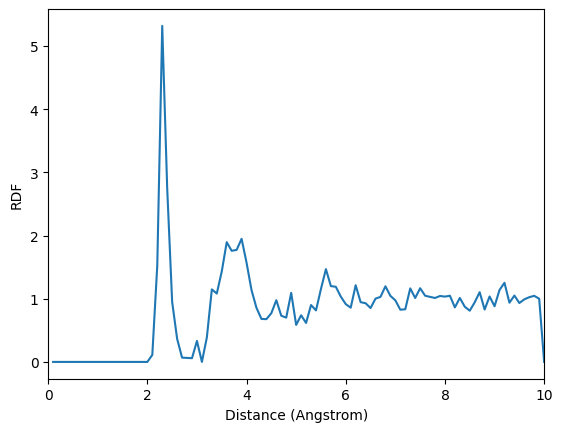

In [4]:
def get_atoms(jid):
    dat = get_jid_data(jid=jid, dataset="dft_3d")
    atoms= Atoms.from_dict(dat["atoms"]).get_conventional_atoms
    dim = get_supercell_dims(atoms,enforce_c_size=10)
    atoms = atoms.make_supercell([dim[0], dim[1], dim[2]])
    print(atoms)
    return atoms.ase_converter()

jid='JVASP-41'
jid='JVASP-1002'
atoms = get_atoms(jid)
atoms.set_calculator(calc)
t1=time.time()

dt = 1 * units.fs

temp0, nsteps0 = 5500, 1000
temp1, nsteps1 = 300, 2000
taut = 20*units.fs

MaxwellBoltzmannDistribution(atoms, temp0*units.kB)
dyn = NVTBerendsen(atoms, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={atoms.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)


traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



t2=time.time()
print('Time taken', t2-t1)
def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_si_2k.gif', writer="imagemagick")
plt.close()

traj = Trajectory('md.traj')
atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


In [5]:
!ls -altr

total 10912
drwxr-xr-x 4 root root     4096 Aug 15 13:35 .config
drwxr-xr-x 1 root root     4096 Aug 15 13:35 sample_data
drwxr-xr-x 1 root root     4096 Aug 18 18:02 ..
drwxr-xr-x 6 root root     4096 Aug 18 18:05 alignn
-rw-r--r-- 1 root root 10643271 Aug 18 18:22 md.traj
drwxr-xr-x 1 root root     4096 Aug 18 18:23 .
-rw-r--r-- 1 root root   505892 Aug 18 18:23 ani_si_2k.gif


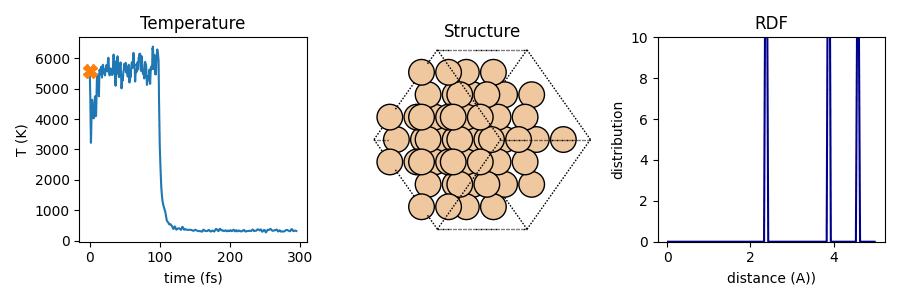

In [6]:
from IPython.display import Image, display

display(Image(filename='ani_si_2k.gif'))


Al2O3

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:03<00:00, 12.9MiB/s]


Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
<timed exec>:12: DeprecationWarning: Please use atoms.calc = calc
/usr/local/lib/python3.10/site-packages/ase/md/md.py:53: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))
/usr/local/lib/python3.10/site-packages/alignn/ff/ff.py:295: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  torch.tensor(atoms.cell)


System
1.0
7.20522 -12.47982 0.0
7.20522 12.47982 0.0
0.0 0.0 13.09743
Al O 
108 162 
direct
0.11111111111111115 0.22222222222222218 0.31440267807851674 Al
0.11111111111111119 0.5555555555555555 0.31440267807851674 Al
0.1111111111111112 0.8888888888888887 0.31440267807851674 Al
0.4444444444444445 0.2222222222222222 0.31440267807851674 Al
0.4444444444444445 0.5555555555555555 0.31440267807851674 Al
0.44444444444444453 0.8888888888888888 0.31440267807851674 Al
0.7777777777777778 0.22222222222222215 0.31440267807851674 Al
0.7777777777777778 0.5555555555555556 0.31440267807851674 Al
0.7777777777777778 0.8888888888888887 0.31440267807851674 Al
0.22222222222222224 0.1111111111111111 0.1855973219214833 Al
0.22222222222222227 0.4444444444444444 0.1855973219214833 Al
0.22222222222222227 0.7777777777777777 0.1855973219214833 Al
0.5555555555555556 0.11111111111111113 0.1855973219214833 Al
0.5555555555555556 0.44444444444444436 0.1855973219214833 Al
0.5555555555555557 0.7777777777777777 0.18559732

MovieWriter imagemagick unavailable; using Pillow instead.


Time taken 2493.5080280303955
System
1.0
7.20522 -12.47982 0.0
7.20522 12.47982 0.0
0.0 0.0 13.09743
Al O 
108 162 
direct
0.10446616458433657 0.22643930711254268 0.33533386288483674 Al
0.12068441486877957 0.5821468507726227 0.30765801895686395 Al
0.11031000847263413 0.8631736263560894 0.32355614839307456 Al
0.4417230416764553 0.21921310840310834 0.21244660702805201 Al
0.4459846343992443 0.5625828725181885 0.28979541848322815 Al
0.4599063582347734 0.9116032616425904 0.31032694234146835 Al
0.7672081793401656 0.23014717963329112 0.31330424782105326 Al
0.7913288968852578 0.5661109912044883 0.3079727770518158 Al
0.7976196928353159 0.8943744553863073 0.32285893112617525 Al
0.1971095816455009 0.09017679368659477 0.19952401700423655 Al
0.20774733148184948 0.4402704207036732 0.18351801162253298 Al
0.25845434414934454 0.8022488190182194 0.21028627243958223 Al
0.5508594425082339 0.1374261385966841 0.3092291330750129 Al
0.5970724733918561 0.46891930183259056 0.17679093416695446 Al
0.5698914470947

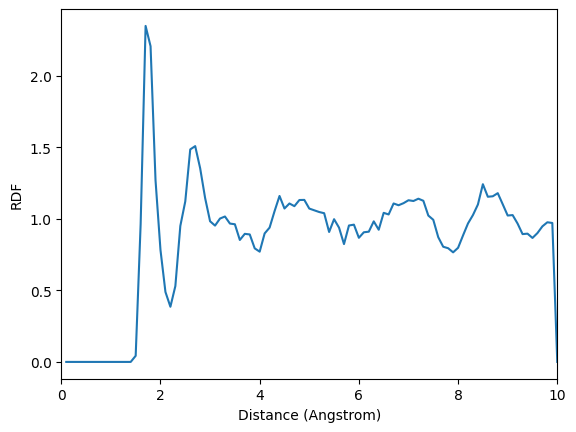

CPU times: user 34min 8s, sys: 18min 53s, total: 53min 2s
Wall time: 42min 32s


In [ ]:
%%time
def get_atoms(jid):
    dat = get_jid_data(jid=jid, dataset="dft_3d")
    atoms= Atoms.from_dict(dat["atoms"]).get_conventional_atoms
    dim = get_supercell_dims(atoms,enforce_c_size=10)
    atoms = atoms.make_supercell([dim[0], dim[1], dim[2]])
    print(atoms)
    return atoms.ase_converter()

jid='JVASP-32'
#jid='JVASP-1002'
atoms = get_atoms(jid)
atoms.set_calculator(calc)
t1=time.time()

dt = 1 * units.fs

temp0, nsteps0 = 5500, 1000
temp1, nsteps1 = 300, 2000
taut = 20*units.fs

MaxwellBoltzmannDistribution(atoms, temp0*units.kB)
dyn = NVTBerendsen(atoms, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={atoms.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)


traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



t2=time.time()
print('Time taken', t2-t1)
def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_sio2_2k.gif', writer="imagemagick")
plt.close()

traj = Trajectory('md.traj')
atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


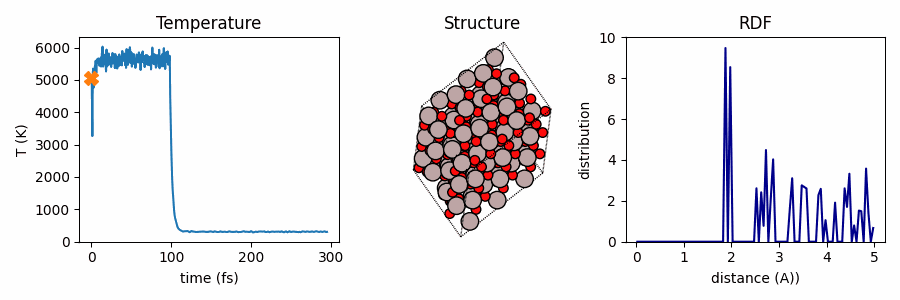

In [ ]:
from IPython.display import Image, display

display(Image(filename='ani_sio2_2k.gif'))


SiO2

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
<timed exec>:12: DeprecationWarning: Please use atoms.calc = calc
/usr/local/lib/python3.10/site-packages/ase/md/md.py:53: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


System
1.0
7.40589 -12.82737 0.0
7.40589 12.82737 0.0
0.0 0.0 10.89862
Si O 
54 108 
direct
0.17816363699811932 7.571146655805419e-18 0.3333333333333333 Si
0.17816363699811932 7.571146655805419e-18 0.8333333333333334 Si
0.1781636369981193 0.33333333333333326 0.3333333333333333 Si
0.1781636369981193 0.33333333333333326 0.8333333333333334 Si
0.17816363699811935 0.6666666666666666 0.3333333333333333 Si
0.17816363699811935 0.6666666666666666 0.8333333333333334 Si
0.5114969703314526 5.3773709651121834e-18 0.3333333333333333 Si
0.5114969703314526 5.3773709651121834e-18 0.8333333333333334 Si
0.5114969703314526 0.3333333333333333 0.3333333333333333 Si
0.5114969703314526 0.3333333333333333 0.8333333333333334 Si
0.5114969703314527 0.6666666666666667 0.3333333333333333 Si
0.5114969703314527 0.6666666666666667 0.8333333333333334 Si
0.844830303664786 6.764084587053246e-18 0.3333333333333333 Si
0.844830303664786 6.764084587053246e-18 0.8333333333333334 Si
0.844830303664786 0.3333333333333334 0.33333

MovieWriter imagemagick unavailable; using Pillow instead.


Time taken 797.608377456665
System
1.0
7.40589 -12.82737 0.0
7.40589 12.82737 0.0
0.0 0.0 10.89862
Si O 
54 108 
direct
0.2005638173790421 0.04080881866454712 0.34187095542120055 Si
0.19909043628223216 0.013674777352957846 0.833803539816895 Si
0.14987960878223863 0.3213235806636334 0.3081899608963415 Si
0.1729222240991307 0.33657709133401853 0.842455489995217 Si
0.34274175236550447 0.6421564337260149 0.18408364862934076 Si
0.12523178684001682 0.7533285550077944 0.7170271298413042 Si
0.5112648087634832 0.0012694426228911009 0.3402467661639912 Si
0.4902934370727428 -0.004457996181289421 0.8292728458402548 Si
0.5098377330360777 0.37487939773750095 0.31282508815569654 Si
0.49195150986901803 0.31721478243640777 0.8757090036891919 Si
0.5225028906500424 0.6875054143808927 0.3073861319281812 Si
0.45946332755753666 0.6194893285036274 0.7704726186795113 Si
0.8648671129329586 -0.014304046193911407 0.327695948934308 Si
0.8123100693760021 -0.004762422921164934 0.815556262446465 Si
0.809932685493422

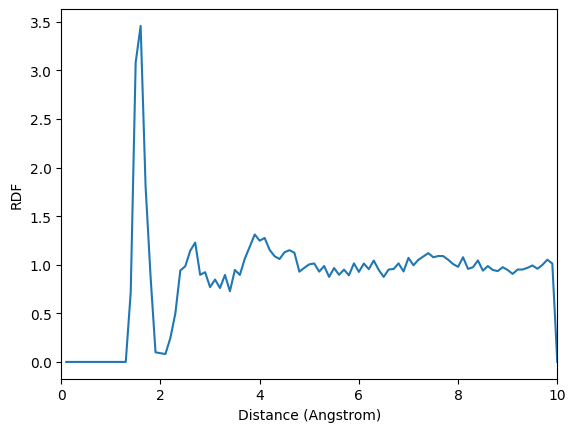

CPU times: user 14min 7s, sys: 9min 25s, total: 23min 32s
Wall time: 14min 2s


In [ ]:
%%time
def get_atoms(jid):
    dat = get_jid_data(jid=jid, dataset="dft_3d")
    atoms= Atoms.from_dict(dat["atoms"]).get_conventional_atoms
    dim = get_supercell_dims(atoms,enforce_c_size=10)
    atoms = atoms.make_supercell([dim[0], dim[1], dim[2]])
    print(atoms)
    return atoms.ase_converter()

jid='JVASP-41'
#jid='JVASP-1002'
atoms = get_atoms(jid)
atoms.set_calculator(calc)
t1=time.time()

dt = 1 * units.fs

temp0, nsteps0 = 5500, 1000
temp1, nsteps1 = 300, 2000
taut = 20*units.fs

MaxwellBoltzmannDistribution(atoms, temp0*units.kB)
dyn = NVTBerendsen(atoms, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={atoms.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)


traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



t2=time.time()
print('Time taken', t2-t1)
def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_sio2_2k.gif', writer="imagemagick")
plt.close()

traj = Trajectory('md.traj')
atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


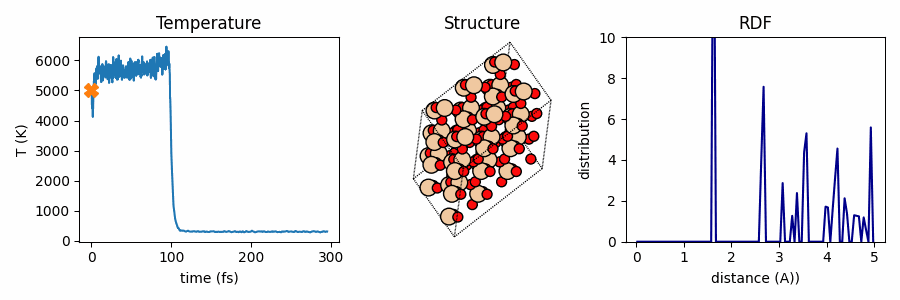

In [ ]:
from IPython.display import Image, display

display(Image(filename='ani_sio2_2k.gif'))
